# CNNによる画像の識別

データの準備
* train_positie: 1500
* train_negative: 29
* test_positie: 32
* test_negative: 5


単純なCNN

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 1529
nb_validation_samples = 37
epochs = 5
batch_size = 4
input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    #rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Using TensorFlow backend.


Found 1529 images belonging to 2 classes.
Found 37 images belonging to 2 classes.
Epoch 1/5
382/382 [==============================] - 80s - loss: 0.3275 - acc: 0.9791 - val_loss: 2.2142 - val_acc: 0.8611
Epoch 2/5
382/382 [==============================] - 69s - loss: 0.3026 - acc: 0.9810 - val_loss: 2.2142 - val_acc: 0.8611
Epoch 3/5
382/382 [==============================] - 72s - loss: 0.2921 - acc: 0.9817 - val_loss: 2.4155 - val_acc: 0.8485
Epoch 4/5
382/382 [==============================] - 70s - loss: 0.3130 - acc: 0.9804 - val_loss: 1.9324 - val_acc: 0.8788
Epoch 5/5
382/382 [==============================] - 71s - loss: 0.3026 - acc: 0.9810 - val_loss: 0.9662 - val_acc: 0.9394


学習済みモデルを使う  

参考：[KerasでVGG16を使う](http://aidiary.hatenablog.com/entry/20170104/1483535144)

('n03032252', 'cinema', 0.59537506)
('n02825657', 'bell_cote', 0.15956776)
('n03781244', 'monastery', 0.032674879)
('n02708093', 'analog_clock', 0.020105448)
('n03126707', 'crane', 0.018185772)
('n03028079', 'church', 0.017775293)
('n06874185', 'traffic_light', 0.016929209)
('n06794110', 'street_sign', 0.014002172)
('n04005630', 'prison', 0.012792707)
('n03877845', 'palace', 0.012039638)


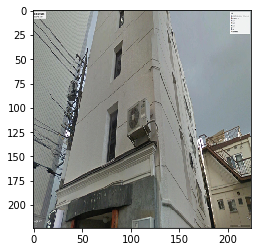

In [2]:
%matplotlib inline
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import sys
import matplotlib.pyplot as plt

"""
ImageNetで学習済みのVGG16モデルを使って入力画像のクラスを予測する
"""

# 学習済みのVGG16をロード
# 構造とともに学習済みの重みも読み込まれる
model = VGG16(weights='imagenet')
# model.summary()

# 画像ファイルを読み込む
# サイズはVGG16のデフォルトである224x224にリサイズされる
#filename = './data/train/positive/201702_003_0129.jpg'
#filename = './data/train/positive/20170117_001_0114.jpg'
filename = './data/train/positive/20170119_001_0073.jpg'
img = image.load_img(filename, target_size=(224, 224))
plt.imshow(img)

# 読み込んだPIL形式の画像をarrayに変換
x = image.img_to_array(img)

# 3次元テンソル（rows, cols, channels) を
# 4次元テンソル (samples, rows, cols, channels) に変換
# 入力画像は1枚なのでsamples=1でよい
x = np.expand_dims(x, axis=0)

# Top-5のクラスを予測する
# VGG16の1000クラスはdecode_predictions()で文字列に変換される
preds = model.predict(preprocess_input(x))
results = decode_predictions(preds, top=10)[0]
for result in results:
    print(result)